<a href="https://colab.research.google.com/github/sirfara12/Pembelajaran-Mesin-Semester-5/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAMA : SIRFARATIH**
## **NIM  : 2341720072**
## **KELAS : TI 3G**


# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [83]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [84]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [85]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [86]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
# Data Size
df.shape

(48842, 15)

In [58]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [88]:
# Jawab Soal 1
df.isnull().sum()

# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Berdasarkan hasil inspeksi data variabel yang memiliki nilai yang hilang yaitu:


*   Workclass = 1836 nilai yang hilang
*   Occupation = 1843 nilai yang hilang
*   Native country = 583 nilai yang hilang





## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [89]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# workclass
df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)

# occupation
df['occupation'].fillna(value=df['occupation'].mode()[0], inplace=True)

# native-country
df['native-country'].fillna(value=df['native-country'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


/tmp/ipython-input-1497234169.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value=df['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-1497234169.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [90]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].replace('?', 'Others')
    df[col] = df[col].str.strip()

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique()[:10])



workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']

education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate']

marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct']

relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex:
['Male' 'Female']

native-country:
['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England']

income:
['<=50K' '>50K' '<=50K.' '>50K.']


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

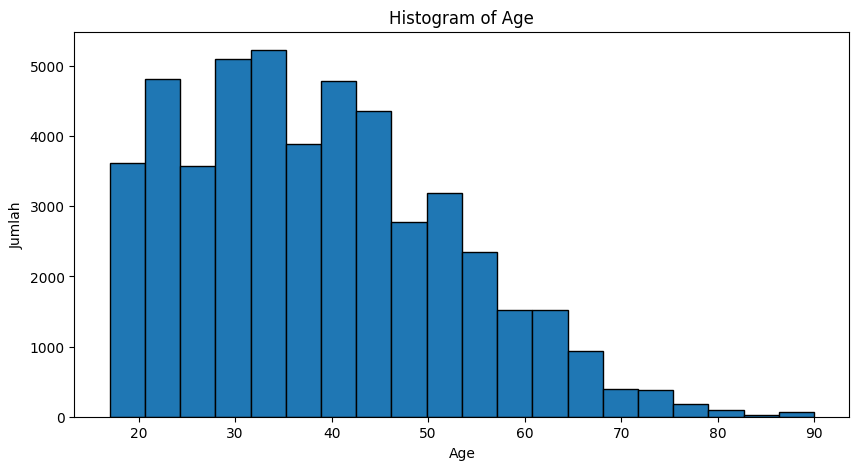

In [91]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.title('Histogram of Age')
plt.show()

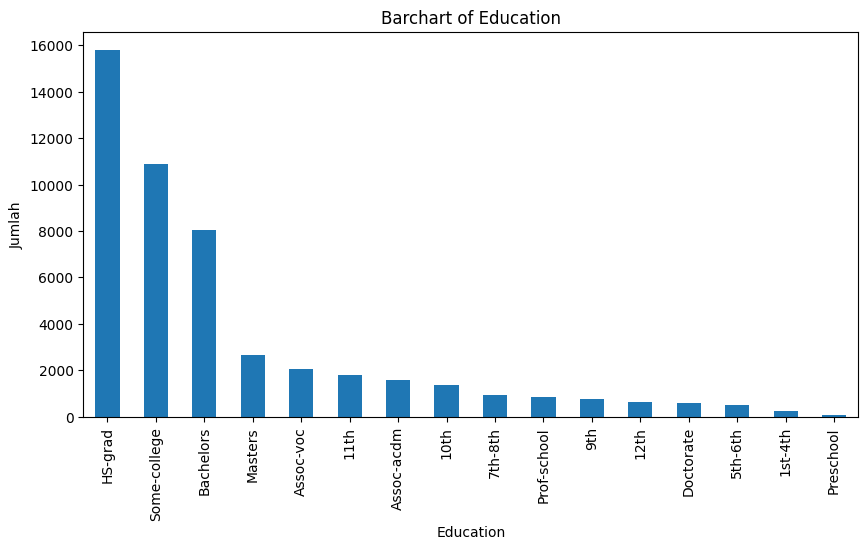

In [92]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10,5))
df['education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.title('Barchart of Education')
plt.show()

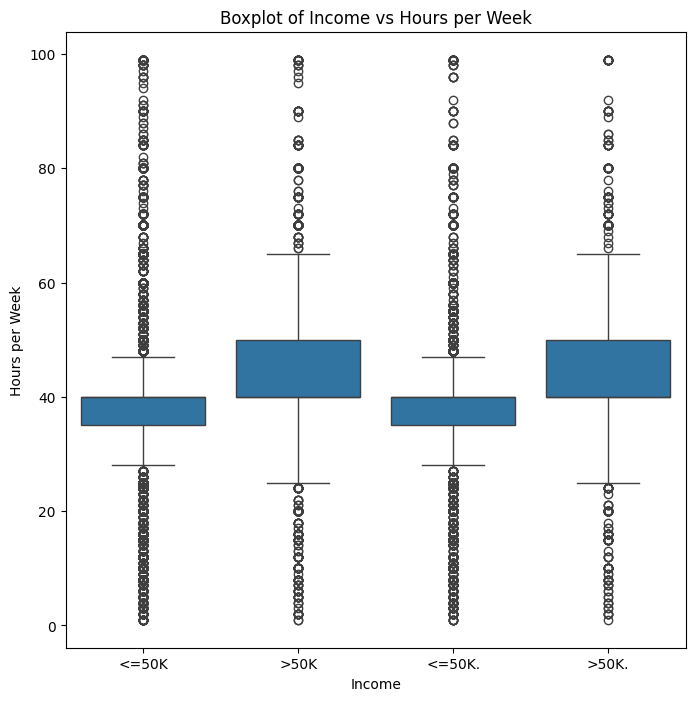

In [93]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,8))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Boxplot of Income vs Hours per Week')
plt.show()

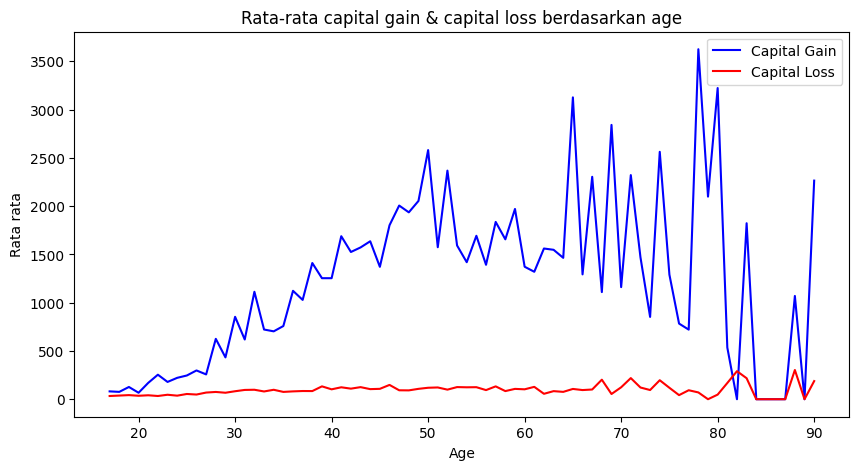

In [94]:
# Jawab 1.4 - Lineplot
age_gain = df.groupby('age')['capital-gain'].mean()
age_loss = df.groupby('age')['capital-loss'].mean()

plt.figure(figsize=(10,5))
plt.plot(age_gain.index, age_gain.values, label='Capital Gain', color='blue')
plt.plot(age_loss.index, age_loss.values, label='Capital Loss', color='red')
plt.xlabel('Age')
plt.ylabel('Rata rata')
plt.title('Rata-rata capital gain & capital loss berdasarkan age')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  1. Fenomema pada distribudi age:
    - distribusi condong ke kanan
    - jumlah individu usia tua lebih sedikit
    - ada batasan usia minimum 17 dan maksimum 90.
  2. jika terdapat data yang hilang pada variabel age maka strategi yang digunakan yaitu
     imputasi dengan mean atau median, median lebih aman karena distribusi age tidak simetris.
  3. jumlah outlier pada setiap kategori income terhadap hours-per-week paling banyak adalah kategori <=50K
     dibanding dengan income >50k, dikarenakan ada individu yang jam kerjanya sangat tinggi. jadi kategori income <=50k yaitu
     paling banyak memiliki outlier
'''


'\n  1. Fenomema pada distribudi age:\n    - distribusi condong ke kanan\n    - jumlah individu usia tua lebih sedikit\n    - ada batasan usia minimum 17 dan maksimum 90. \n  2. jika terdapat data yang hilang pada variabel age maka strategi yang digunakan yaitu\n     imputasi dengan mean atau median, median lebih aman karena distribusi age tidak simetris.\n  3. jumlah outlier pada setiap kategori income terhadap hours-per-week paling banyak adalah kategori <=50K\n     dibanding dengan income >50k, dikarenakan ada individu yang jam kerjanya sangat tinggi. jadi kategori income <=50k yaitu \n     paling banyak memiliki outlier\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [96]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df['sex'] = le.fit_transform(df['sex'])
df[['sex', 'income']].head()


,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

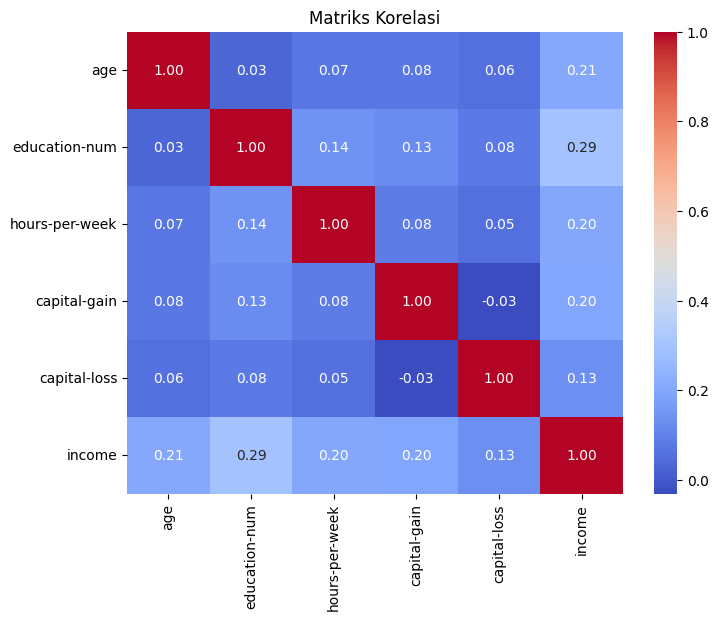

In [72]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
corr_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()


In [ ]:
# Hasil analisis jelaskan pada cell ini
hasil analisis korelasi adalah: variabel education-num dan capital-gain memiliki hubungan positif yang cukup kuat dnegan income.
Variabel hours-per-week dan age juga berhubungan positif dengan income, meskipun korelasinya relatif lemah. Sementara itu,
capital-loss hampir tidak memiliki hubungan yang berarti dengan income.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [98]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


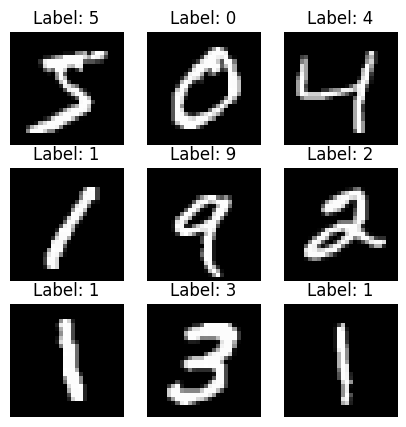

In [99]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape data awal: (10000, 28, 28)
Shape data setelah upsampling: (10000, 32, 32)


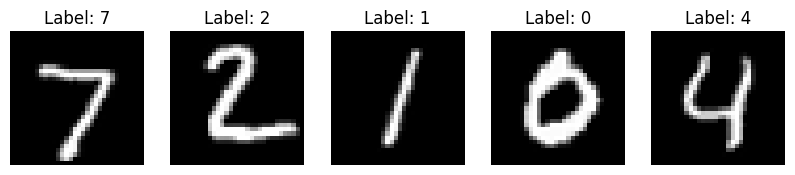

In [101]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

(_, _), (x_test, y_test) = mnist.load_data()
print("Shape data awal:", x_test.shape)
# array kosong
x_test_up = np.zeros((x_test.shape[0], 32, 32), dtype=np.float32)

# Resize 28x28 menjadi 32x32
for i in range(x_test.shape[0]):
    x_test_up[i] = cv2.resize(x_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape data setelah upsampling:", x_test_up.shape)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test_up[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Shape: (10000, 32, 32)


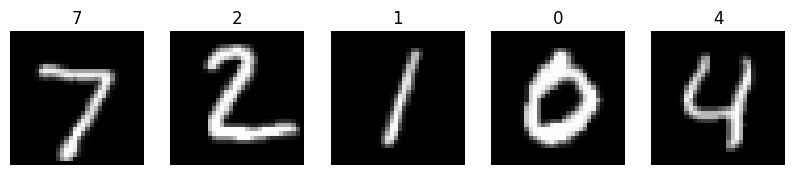

In [102]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
x_test_up = np.array([cv2.resize(img, (32, 32)) for img in x_test], dtype=np.float32) / 255.0

print("Shape:", x_test_up.shape)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_up[i], cmap="gray")
    plt.title(y_test[i])
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [103]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
x_test_flat = np.zeros((x_test_up.shape[0], 32*32), dtype=np.float32)

# Flatten citra 32 menjadi ID(1024)
for i in range(x_test_up.shape[0]):
    x_test_flat[i] = x_test_up[i].reshape(-1)

print("Shape data flatten:", x_test_flat.shape)
print("Contoh data flatten:", x_test_flat[0][:20])


Shape data flatten: (10000, 1024)
Contoh data flatten: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
